In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
!pip install numpy requests nlpaug



In [8]:
import nlpaug
!pwd

/content


In [10]:
from nlpaug.util.audio.loader import AudioLoader
from nlpaug.util.audio.visualizer import AudioVisualizer


In [17]:
import librosa
import numpy as np
import sklearn

In [19]:
def spectrogram(fpath, spectrogram):
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(
        librosa.power_to_db(spectrogram, ref=np.max))
    plt.savefig(fpath,bbox_inches='tight')
    plt.show()

**1-choosing a audio file to convert to Mel Spectrogram lets select a rock song**

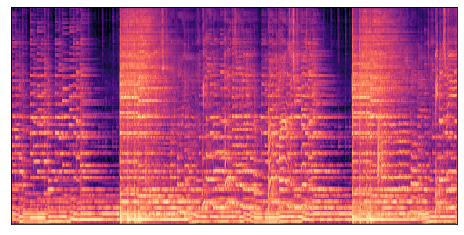

In [20]:
AUDIO_FILE='/content/drive/MyDrive/.kaggle/Data/genres_original/rock/rock.00099.wav'
data = AudioLoader.load_mel_spectrogram(AUDIO_FILE, n_mels=128)
# AudioVisualizer.spectrogram('Original', data)
spectrogram("demo.png",data)

**2-Using our model CNN2D we have to predict the Genres as Rock**

In [21]:
image = PIL.Image.open("demo.png")
image_array = np.array(image)

In [41]:
image_array.shape

(235, 464, 4)

**3-We need to preprocess the image as the model need a (1, 235, 464, 3)**

In [56]:
from tensorflow.keras.preprocessing import image
img = image.load_img('demo.png', target_size=(235, 464,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x.shape
# x = preprocess_input(x)

(1, 235, 464, 3)

In [24]:
batch_size = 32
img_height = 235
img_width = 464

**4-Defining CNN2D model architecture to load our saved weights**

In [30]:
num_classes = 10

num_classes = 10
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 235, 464, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 235, 464, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 117, 232, 16)     0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 232, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 58, 116, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 116, 64)      

**5-Load the weights**

In [32]:

checkpoint_path='/content/drive/MyDrive/.kaggle/Data/CNN2D_with_Spec_Aug.ckpt'
model.load_weights(checkpoint_path)


**6-Prediction**

In [59]:
labels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [60]:
labels[np.argmax(model.predict(x))]

'rock'